In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

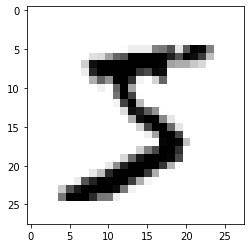

In [5]:
plt.imshow(train_images[0],cmap='gray_r')
plt.show()

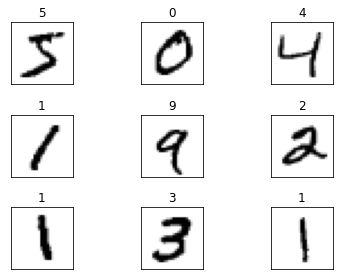

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i],cmap='gray_r')
    plt.title(train_labels[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()    
plt.show()


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#casting
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing
train_images /= 255
test_images /= 255

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
#(num_image,hieght,width,channel)

In [11]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [12]:
train_images[0].shape

(28, 28, 1)

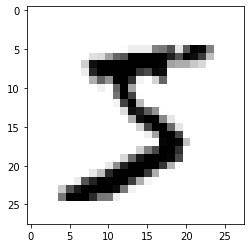

In [13]:
plt.imshow(train_images[0],cmap='gray_r')
plt.show()

In [14]:
# CNN
model = models.Sequential()
# Conv2D(num_kernel,size(3,3))
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
#(26,26)
model.add(layers.MaxPooling2D((2,2)))
#(13,13)
model.add(layers.Conv2D(56,(3,3),activation='relu'))
#(11,11)
model.add(layers.MaxPool2D((2,2)))
#(5,5)
model.add(layers.Conv2D(56,(3,3),activation='relu'))
#(3,3)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [17]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)

Epoch 1/5


C:\Users\HP\anaconda3\envs\deepl\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4800/4800 [==============================] - 65s 13ms/step - loss: 0.1374 - accuracy: 0.9579 - val_loss: 0.0573 - val_accuracy: 0.9831
Epoch 2/5
4800/4800 [==============================] - 62s 13ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0479 - val_accuracy: 0.9859
Epoch 3/5
4800/4800 [==============================] - 62s 13ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0471 - val_accuracy: 0.9864
Epoch 4/5
4800/4800 [==============================] - 62s 13ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0466 - val_accuracy: 0.9872
Epoch 5/5
4800/4800 [==============================] - 63s 13ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0391 - val_accuracy: 0.9903


In [18]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.0345 - accuracy: 0.9908


[0.03449667990207672, 0.9908000230789185]

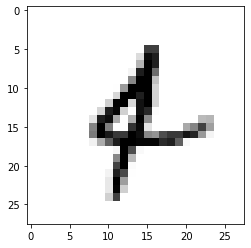

In [19]:
plt.imshow(test_images[300],cmap='gray_r')
plt.show()

In [20]:
model.predict(test_images[300].reshape(1,28,28,1))

array([[2.7843533e-10, 2.2549489e-07, 4.7359113e-06, 2.8130814e-11,
        9.9998045e-01, 6.8762898e-11, 1.4389098e-05, 6.0120705e-08,
        7.8622548e-09, 2.1388392e-07]], dtype=float32)

In [21]:
model.predict(test_images[300].reshape(1,28,28,1)).round()

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
np.argmax(model.predict(test_images[300].reshape(1,28,28,1)))

4